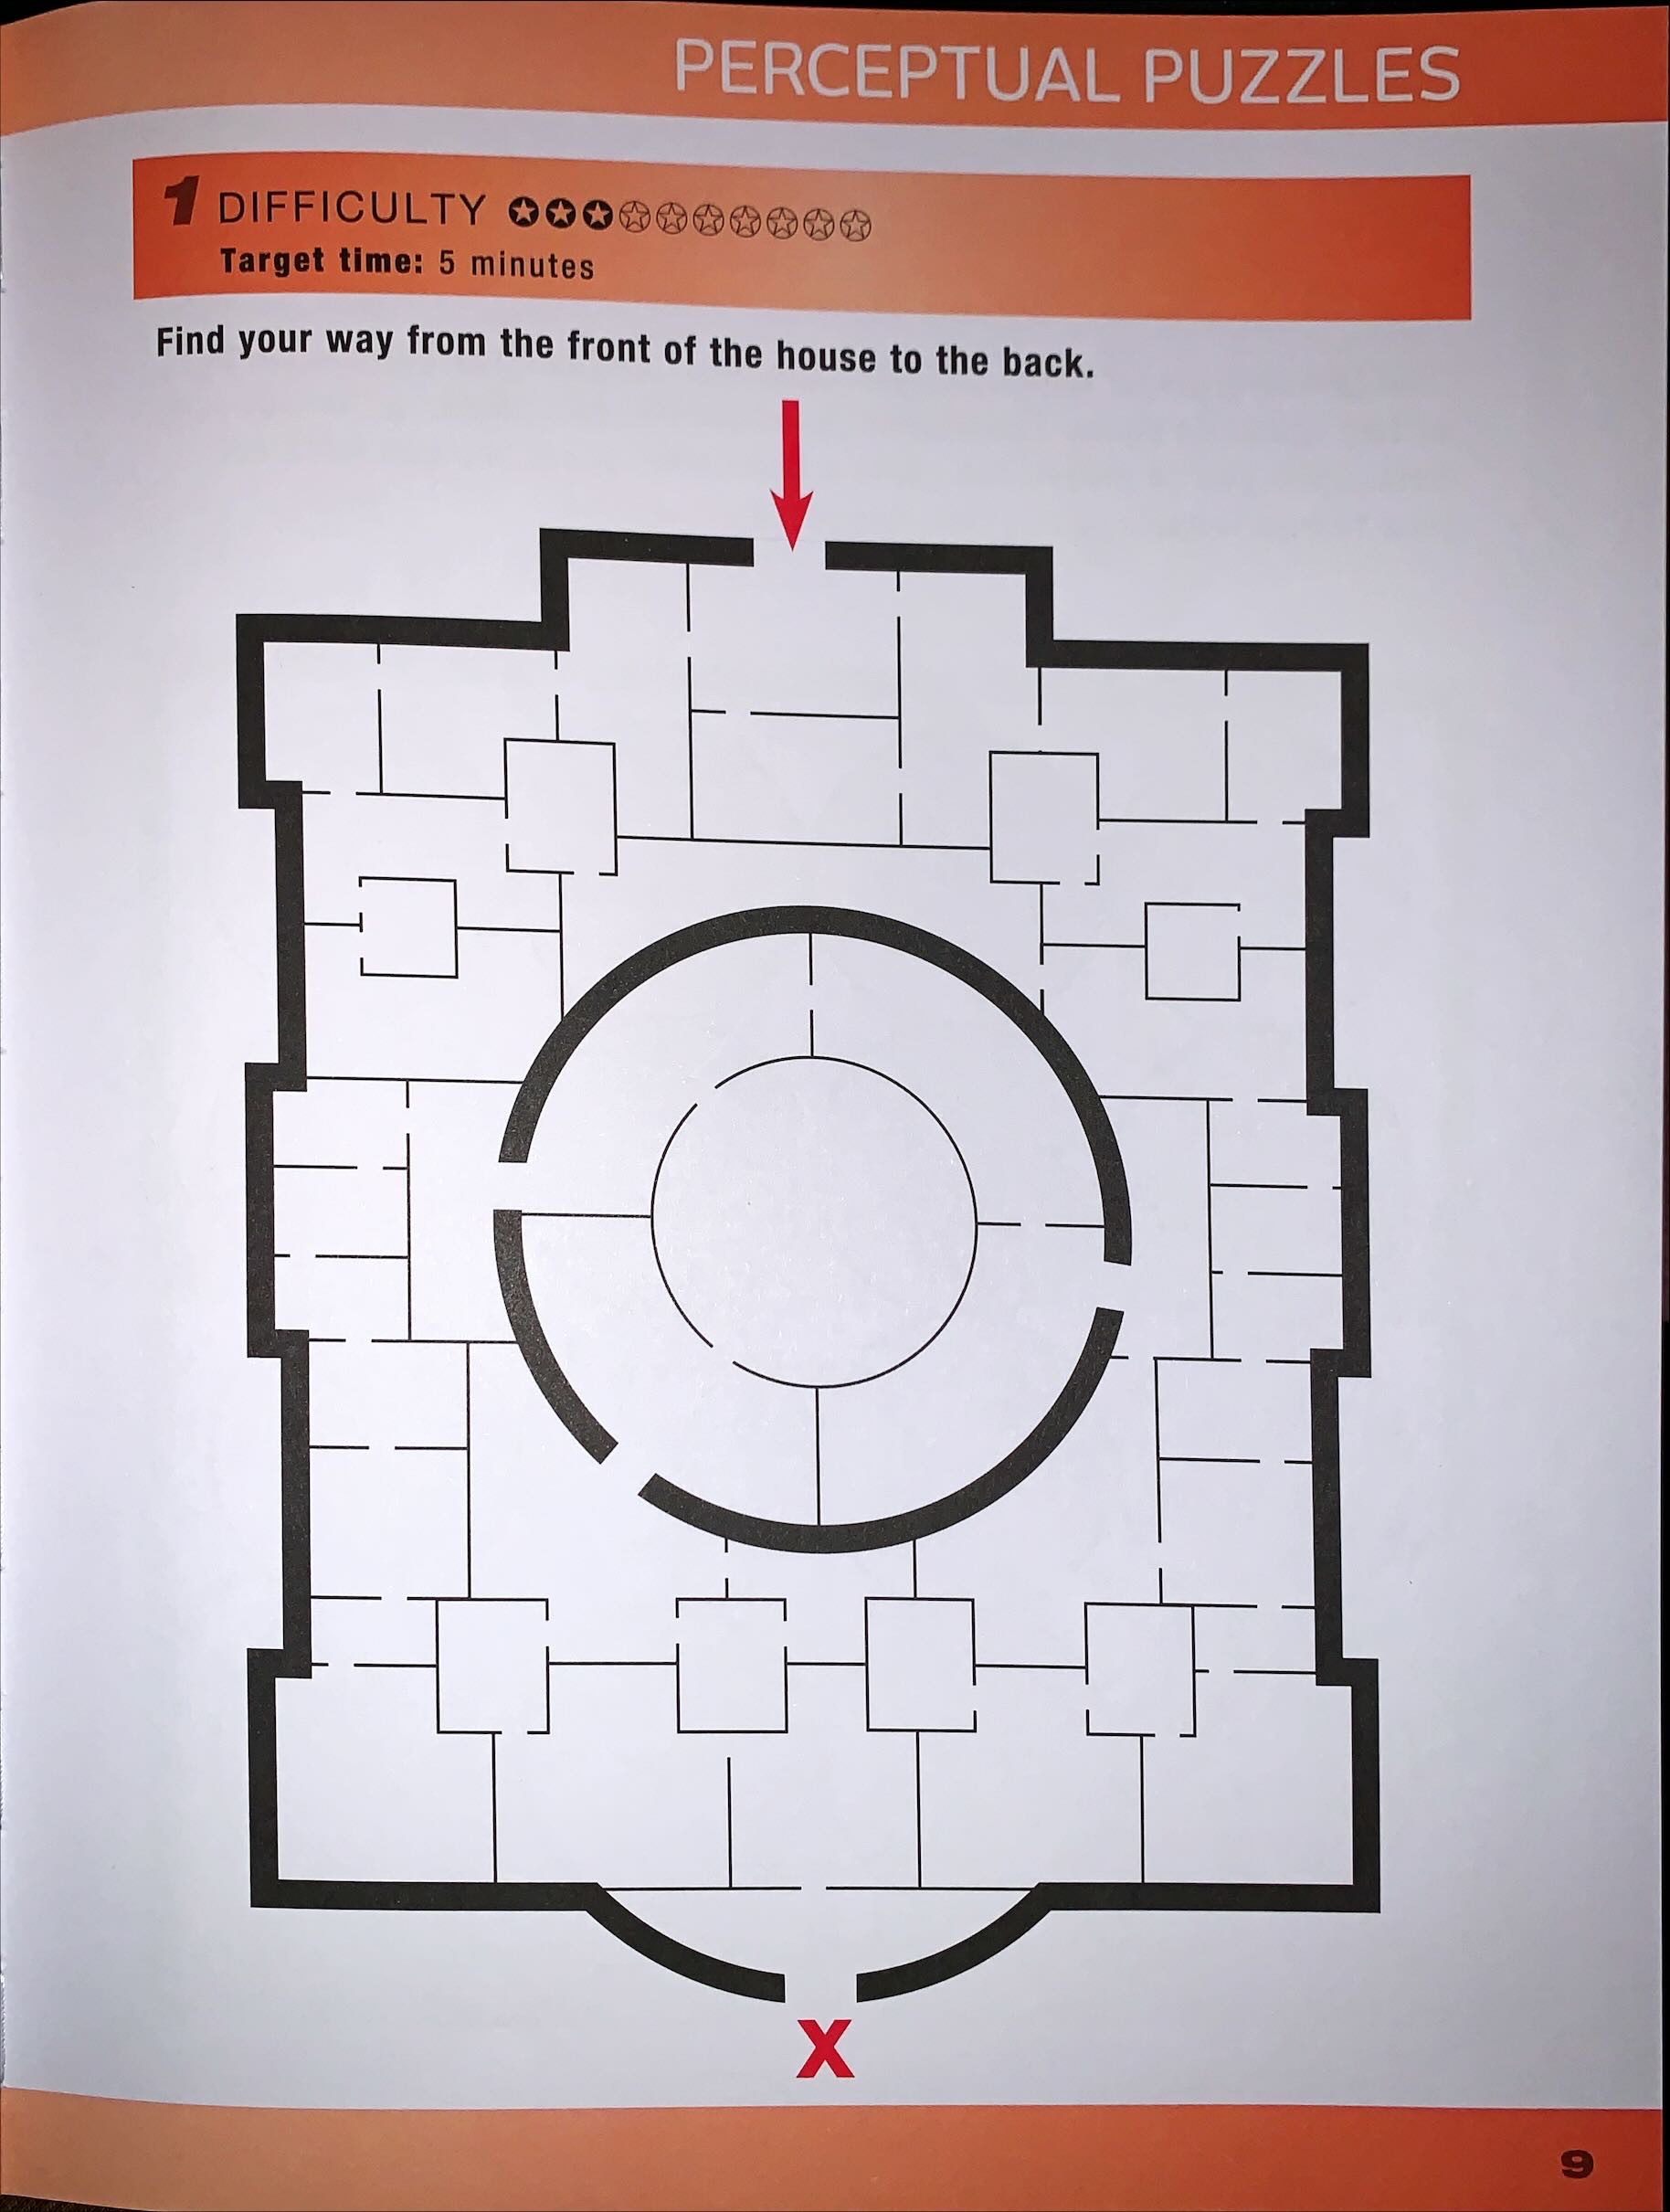

In [335]:
from IPython.display import display
from PIL import Image, ImageOps, ImageDraw

inputImage = Image.open("puzzle.jpeg")
display(inputImage)

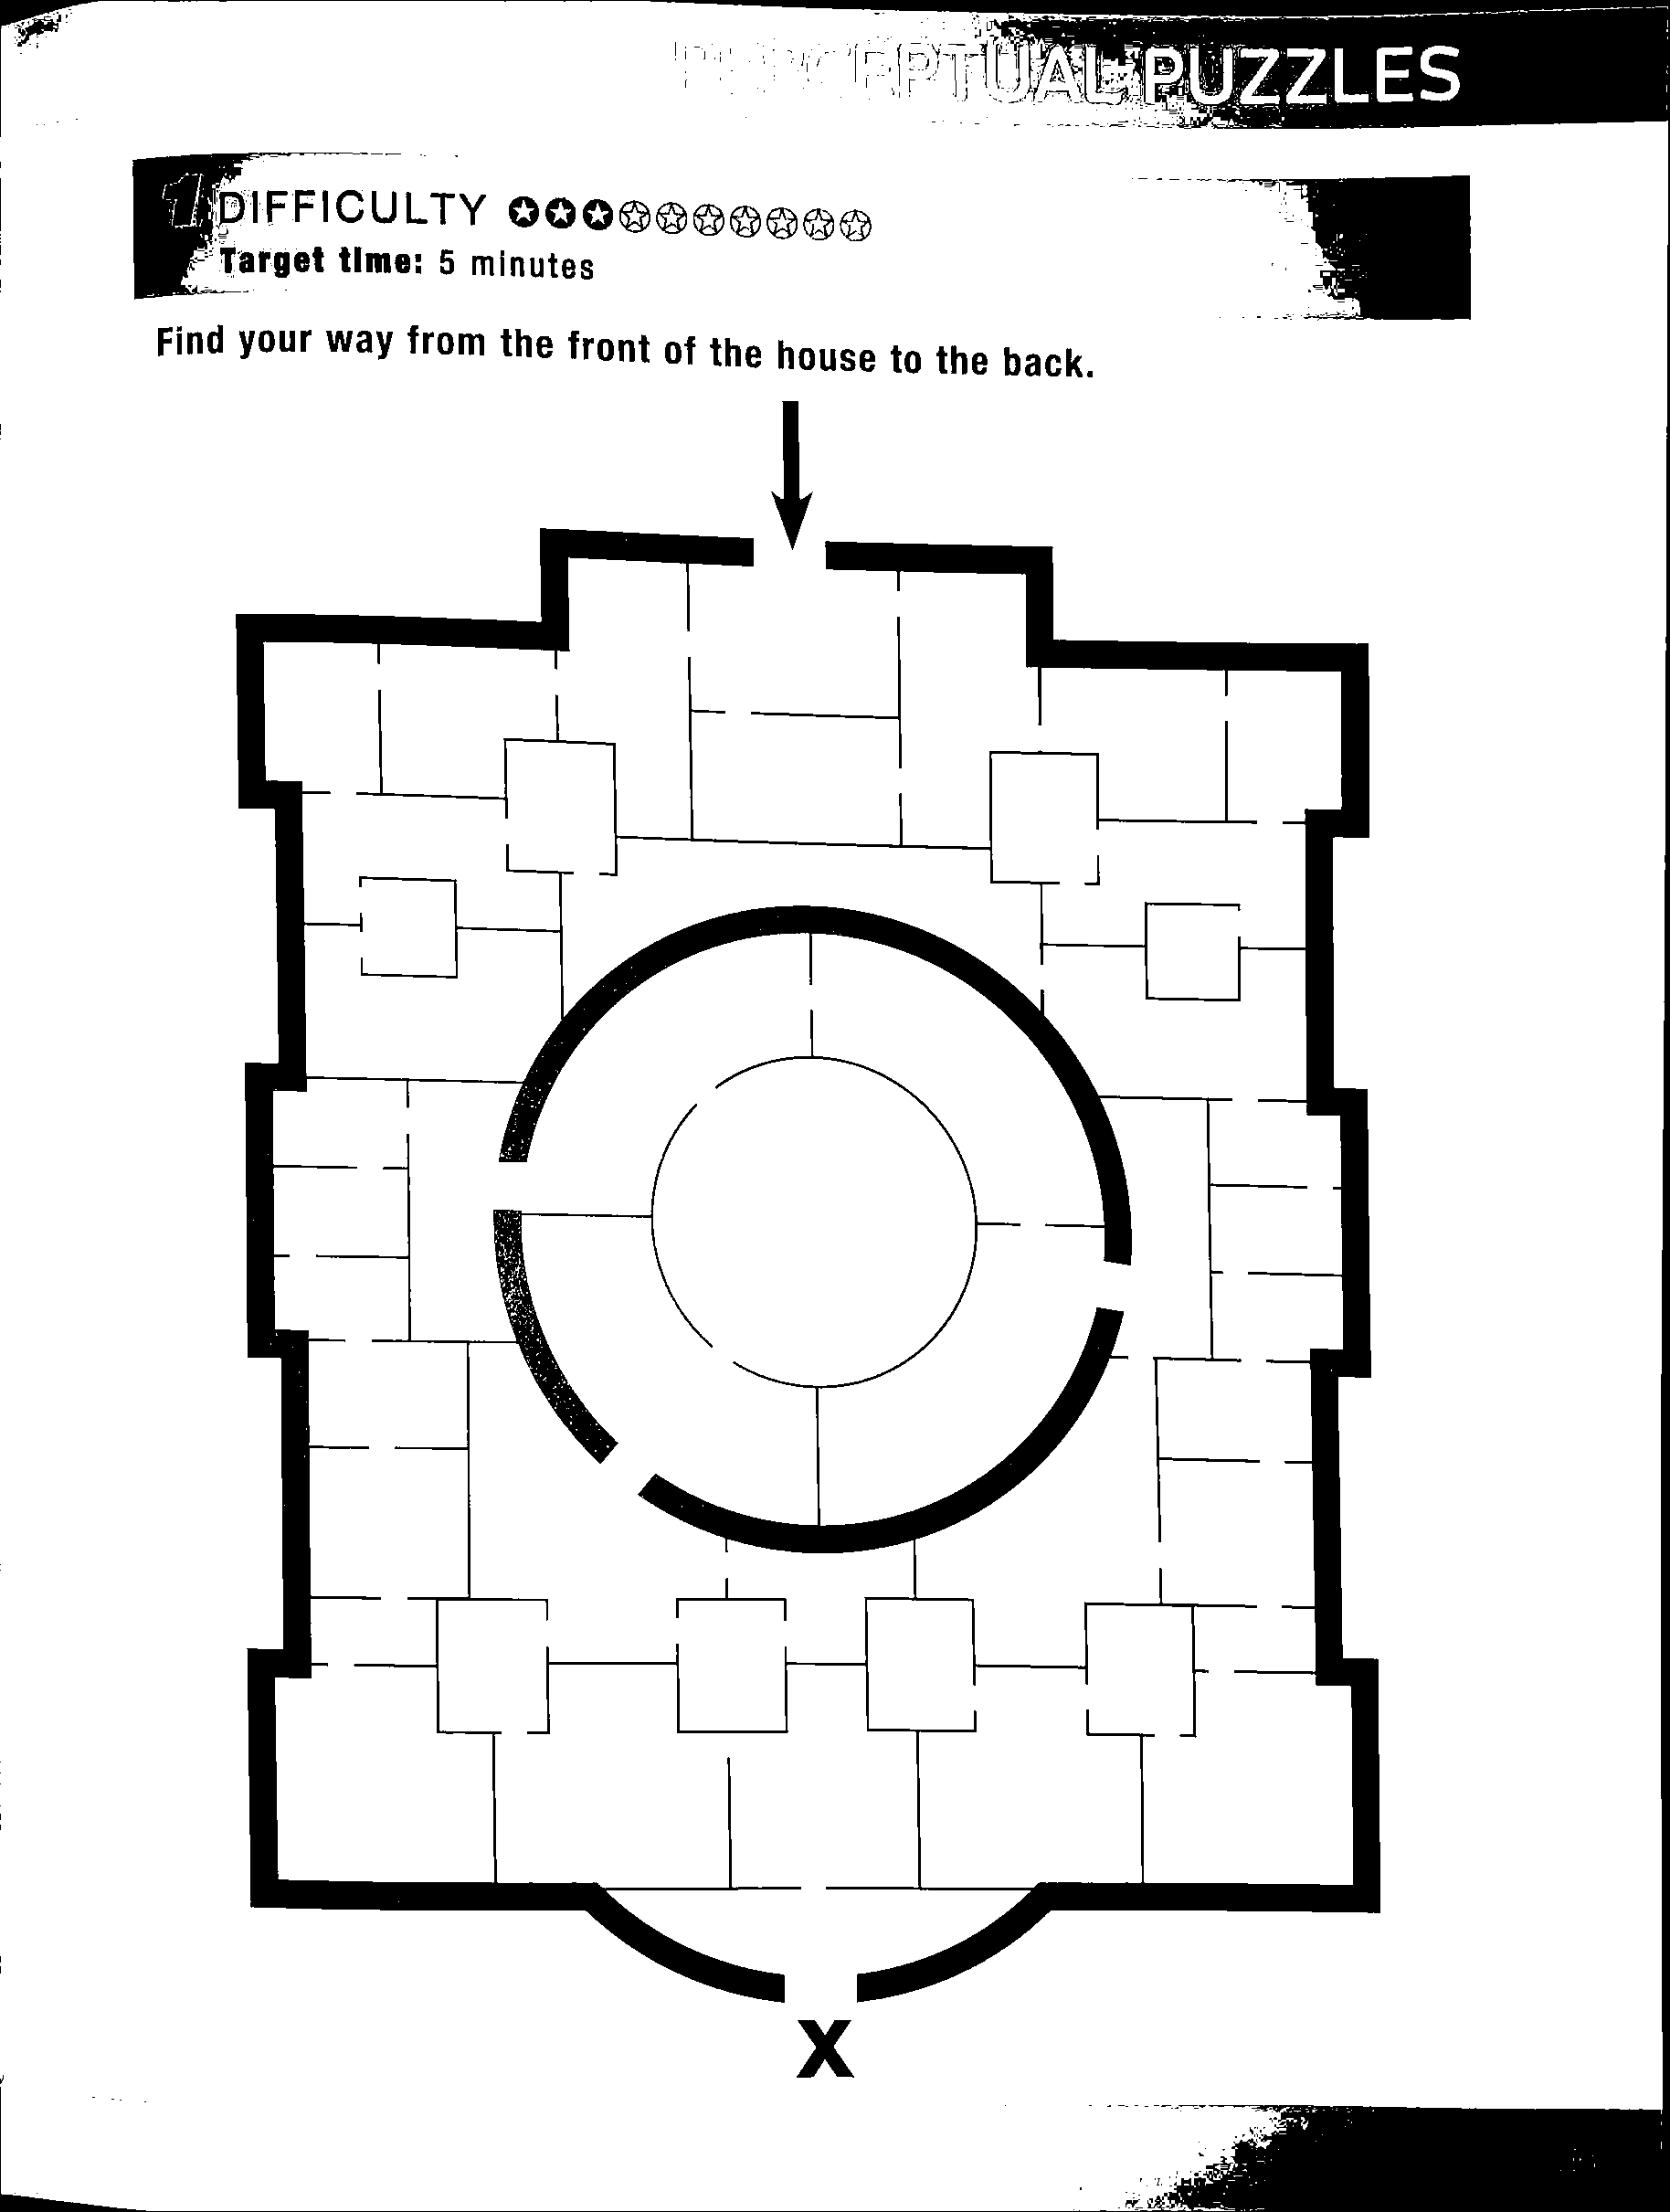

In [336]:
thresh = 100
fn = lambda x : 255 if x > thresh else 0
monochrome = inputImage.convert('L').point(fn, mode='1')
display(monochrome)

1828 2421


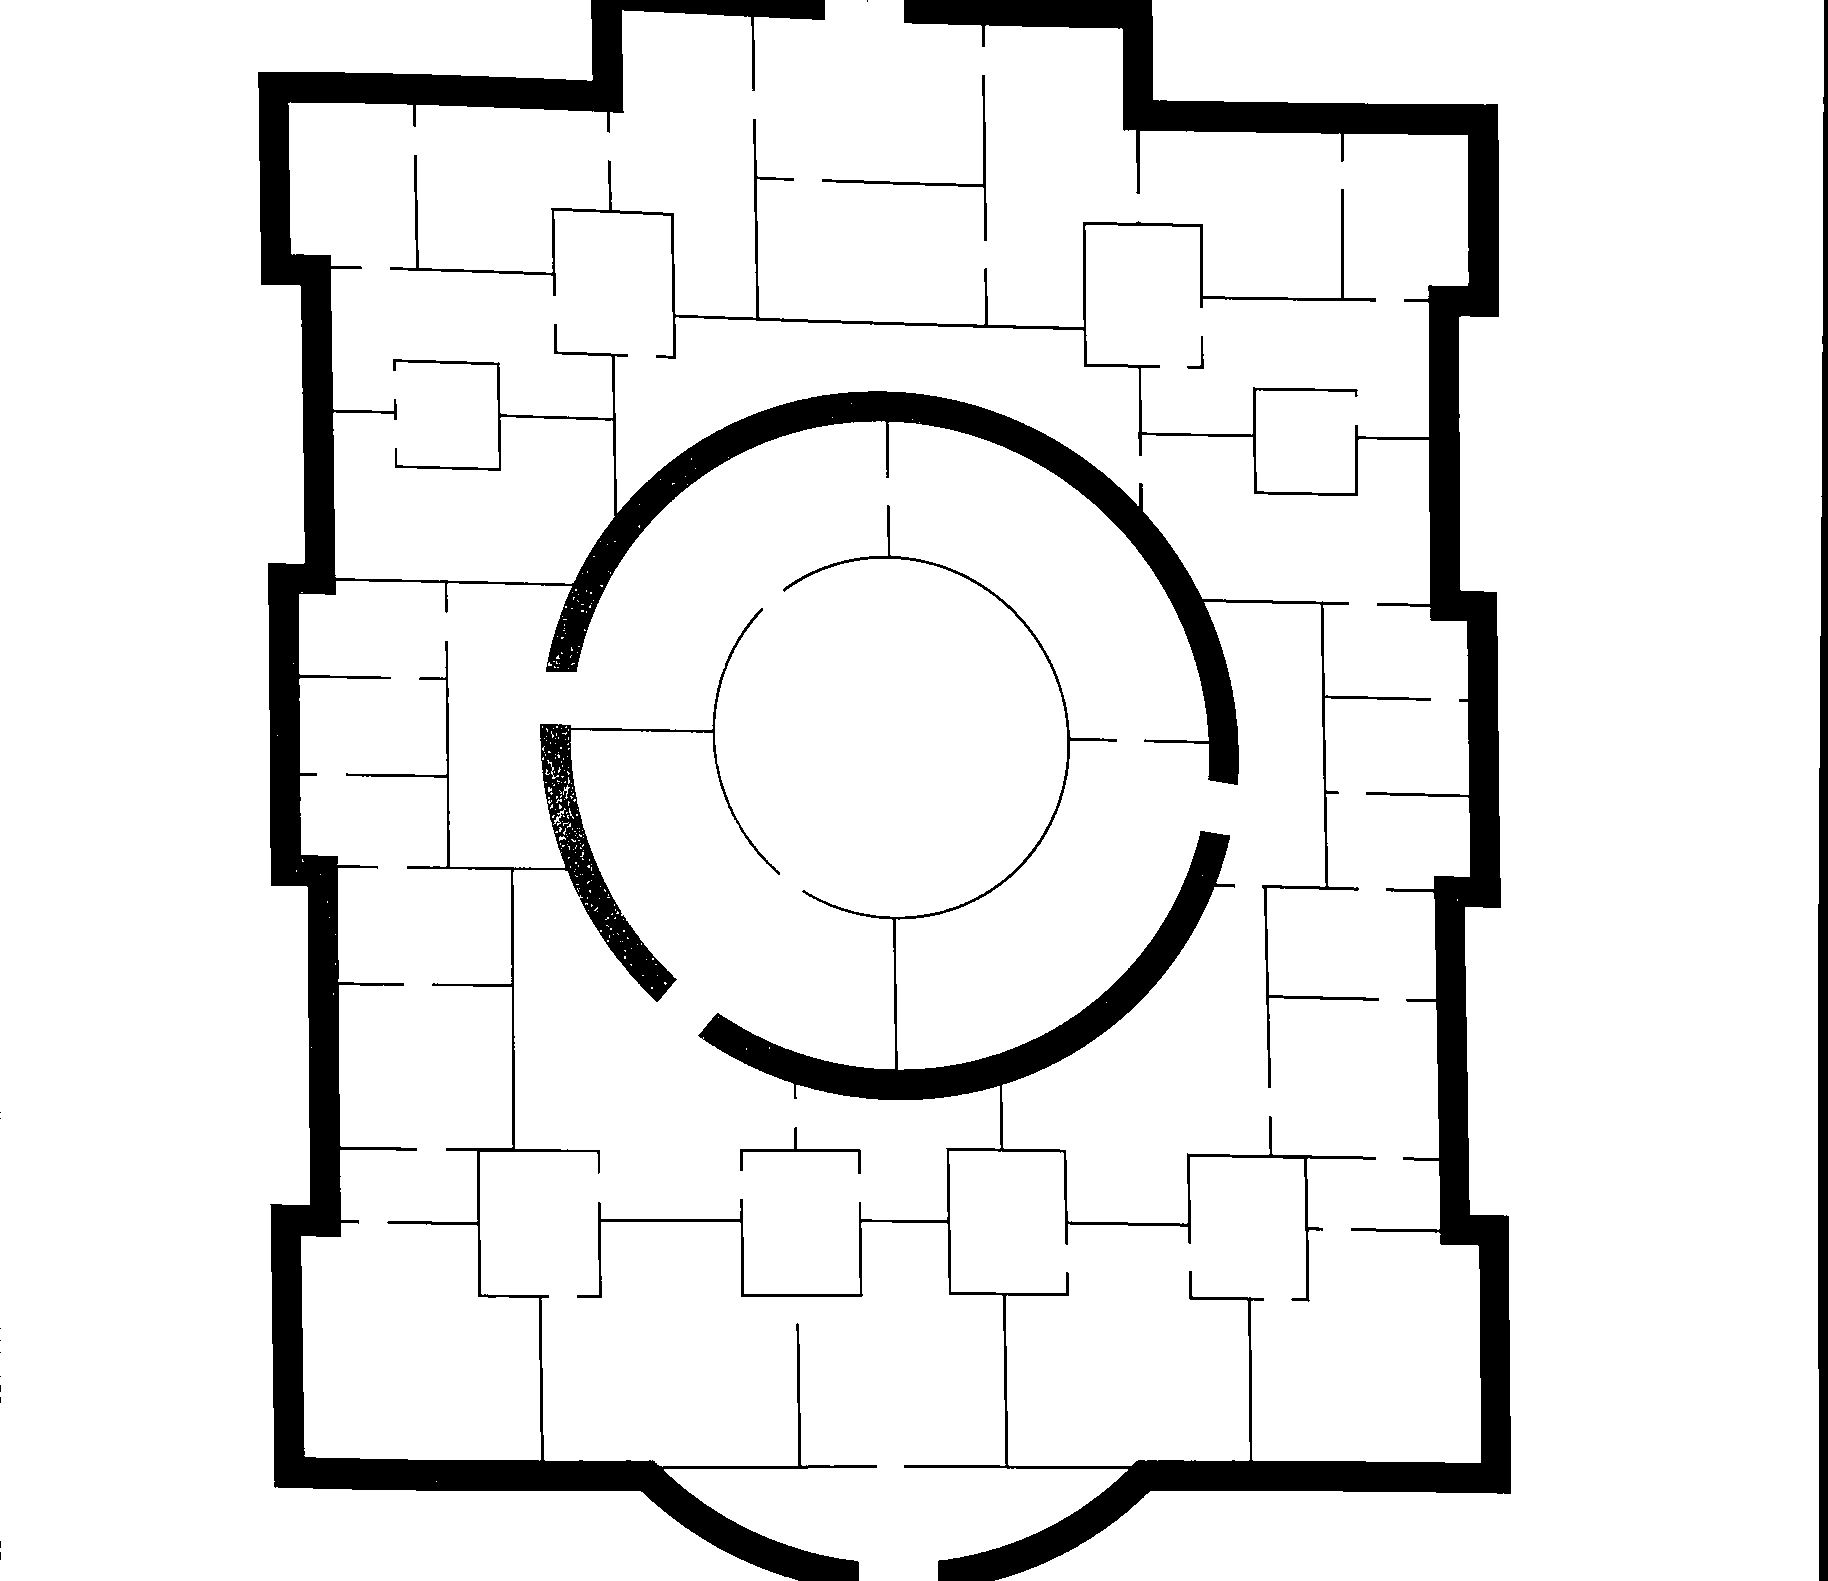

In [337]:
width, height = inputImage.size
print(width, height)
cropped = monochrome.crop((0,600, width, height-240))
display(cropped)

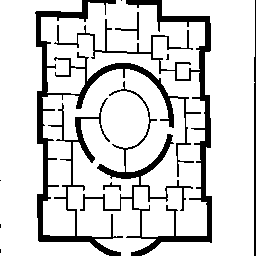

In [338]:
workingImage = cropped.convert('RGB')
workingImage = workingImage.resize((256, 256))
thresh = 250
fn = lambda x : 255 if x > thresh else 0
workingImage = workingImage.convert('L').point(fn, mode='1')
display(workingImage)

In [339]:
# Dead code used to play start and end coordinates

# #Label finish line with pure red, starting with pure green
# workingImage = workingImage.convert('RGB')
# draw = ImageDraw.Draw(workingImage)

# width, height = workingImage.size

# #draw.line(((width/2-100, 20), (width/2, 20)), fill=(255, 0, 0), width= 10)
# draw.point((width/2, 20), fill=(255, 0, 0))
# print((width/2, 20))
# #start = (864, 20)
# #draw.line(((width/2-60, height-20), (width/2+30, height-20)), fill=(0, 255, 0), width= 10)
# draw.point((width/2, height-10), fill=(255, 0, 0))
# print((width/2, height-10))
# #end = (894, 1561)

# display(workingImage)

In [340]:
import numpy as np

invertedMap = np.asarray(workingImage)



(256, 256)
[ True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False  True  True  True  True
  True False  True  True  True  True False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False  Tr

In [341]:
from pathfinding.core.diagonal_movement import DiagonalMovement
from pathfinding.core.grid import Grid
from pathfinding.finder.a_star import AStarFinder

In [342]:
matrix = invertedMap
grid = Grid(matrix=matrix)

start = grid.node(128, 20)
end = grid.node(128, 246)

#start = grid.node(0, 0)
#end = grid.node(2, 2)

finder = AStarFinder(diagonal_movement=DiagonalMovement.always)
path, runs = finder.find_path(start, end, grid)

print('operations:', runs, 'path length:', len(path))
print(grid.grid_str(path=path, start=start, end=end))
#print(path)

operations: 25647 path length: 605
[(128, 20), (127, 20), (126, 20), (125, 20), (124, 20), (123, 20), (122, 20), (121, 20), (120, 20), (119, 20), (118, 20), (117, 20), (116, 20), (115, 20), (114, 20), (113, 20), (112, 20), (111, 20), (110, 20), (109, 20), (108, 20), (107, 19), (106, 18), (105, 18), (104, 18), (103, 18), (102, 18), (101, 18), (100, 18), (99, 18), (98, 18), (97, 19), (96, 20), (95, 21), (94, 22), (93, 23), (92, 24), (91, 24), (90, 24), (89, 24), (88, 24), (87, 24), (86, 24), (85, 24), (84, 24), (83, 24), (82, 24), (81, 24), (80, 24), (79, 24), (78, 24), (77, 24), (76, 24), (75, 24), (74, 24), (73, 24), (72, 24), (71, 24), (70, 24), (69, 24), (68, 24), (67, 24), (66, 24), (65, 24), (64, 24), (63, 24), (62, 24), (61, 24), (60, 24), (59, 24), (58, 24), (57, 24), (56, 25), (56, 26), (56, 27), (56, 28), (56, 29), (56, 30), (56, 31), (56, 32), (56, 33), (56, 34), (56, 35), (56, 36), (56, 37), (56, 38), (56, 39), (56, 40), (55, 41), (54, 42), (53, 43), (54, 44), (55, 45), (56, 

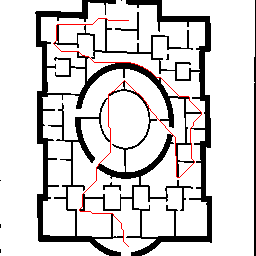

In [343]:
outputImage = workingImage.convert('RGB')
draw = ImageDraw.Draw(outputImage)
for coord in path:
    draw.point(coord, fill=(255, 0, 0))
display(outputImage)